# Dataset Overview:

Name: House Sales Prediction in King County, USA (from Kaggle)

Description: This dataset contains details about house sales in King County, which includes columns such as:
- id: A unique identifier for each sale
- date: The date of the sale
- price: The sale price of the house (target variable)
- bedrooms: Number of bedrooms
- bathrooms: Number of bathrooms
- sqft_living: Square footage of the living space
- sqft_lot: Square footage of the lot
- floors: Number of floors
- waterfront: Whether the house is waterfront or not
- view: Quality of the view (scale 0-4)
- condition: Condition of the house (scale 1-5)
- grade: Overall grade of the house (scale 1-13)
- sqft_above: Square footage of the house excluding the basement
- sqft_basement: Square footage of the basement
- yr_built: Year the house was built
- yr_renovated: Year the house was renovated (if applicable)
- zipcode: Zip code where the house is located
- lat: Latitude of the house
- long: Longitude of the house
- sqft_living15: Living room area in the nearest 15 neighbors
- sqft_lot15: Lot size of the nearest 15 neighbors

Motivation: This is a real-world regression problem, which involves predicting the house price based on multiple features. The dataset is relatively simple but still presents a challenge due to the number of features and the potential for complex relationships between them. We will use this dataset to train a neural network to predict house prices based on these features.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_original = pd.read_csv("kc_house_data.csv")
df = df_original.copy()

In [16]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [17]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


# Sigmoid and ReLU Layers (Regresssion NN)

In [18]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 
            'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = df[features].values
y = df['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid Derivative Function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# ReLU Activation Function
def relu(x):
    return np.maximum(0, x)

# ReLU Derivative Function
def relu_derivative(x):
    return (x > 0).astype(float)

def mse_loss(predictions, targets):
    return np.mean((predictions - targets) ** 2)

# Adam Optimizer
class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0
    
    def update(self, grads, params):
        self.t += 1
        if self.m is None:
            self.m = {key: np.zeros_like(val) for key, val in params.items()}
            self.v = {key: np.zeros_like(val) for key, val in params.items()}
        
        for key in params:
            self.m[key] = self.beta1 * self.m[key] + (1 - self.beta1) * grads[key]
            self.v[key] = self.beta2 * self.v[key] + (1 - self.beta2) * grads[key]**2
            
            m_hat = self.m[key] / (1 - self.beta1**self.t)
            v_hat = self.v[key] / (1 - self.beta2**self.t)
            
            params[key] -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        
        # He initialization for ReLU
        self.W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden_size1))  # Bias for first hidden layer
        
        self.W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
        self.b2 = np.zeros((1, hidden_size2))  # Bias for second hidden layer
        
        self.W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2. / hidden_size2)
        self.b3 = np.zeros((1, output_size))  # Bias for output layer

        # Initialize Adam optimizer
        self.optimizer = AdamOptimizer(learning_rate=0.001)
    
    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = relu(self.Z2)
        
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = self.Z3  # Linear output for regression
        return self.A3
    
    def backward(self, X, y, learning_rate=0.0001, lambda_reg=0.01):
        m = X.shape[0]
        
        # Compute the gradients for the output layer
        dZ3 = self.A3 - y
        dW3 = np.dot(self.A2.T, dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m
        
        # Compute the gradients for the second hidden layer
        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * relu_derivative(self.Z2)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        # Compute the gradients for the first hidden layer
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights with Adam optimizer
        grads = {
            'W1': dW1 + lambda_reg * self.W1,
            'W2': dW2 + lambda_reg * self.W2,
            'W3': dW3 + lambda_reg * self.W3,
            'b1': db1,
            'b2': db2,
            'b3': db3
        }
        
        params = {
            'W1': self.W1,
            'W2': self.W2,
            'W3': self.W3,
            'b1': self.b1,
            'b2': self.b2,
            'b3': self.b3
        }

        # Update parameters with Adam optimizer
        self.optimizer.update(grads, params)

        # Update model parameters
        self.W1 = params['W1']
        self.W2 = params['W2']
        self.W3 = params['W3']
        self.b1 = params['b1']
        self.b2 = params['b2']
        self.b3 = params['b3']

    def train(self, X, y, epochs=500):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)
            if epoch % 10 == 0:
                loss = mse_loss(self.A3, y)
                print(f"Epoch {epoch}, Loss: {loss}")

# Initialize and train the neural network with Adam
nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size1=128, hidden_size2=64, output_size=1)
nn.train(X_train, y_train, epochs=100)

# Make predictions on the test set
predictions_scaled = nn.forward(X_test)

# Inverse scale the predictions
predictions = y_scaler.inverse_transform(predictions_scaled)

# Convert y_test back to original scale
y_test_original = y_scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MSE in original scale
mse = np.mean((predictions - y_test_original)**2)
print("\nTest MSE:", mse)

# Calculate MSE with scaled values
mse_scaled = np.mean((predictions_scaled - y_test.reshape(-1, 1))**2)
print("\nMSE on Scaled Data:", mse_scaled)

rmse = np.sqrt(mse)
print("\nTest RMSE:", rmse)

# Compare predictions and true values (first 10 examples)
print("\nPredictions vs True Values (First 10):")
print(np.hstack((predictions[:10], y_test_original[:10])))


Epoch 0, Loss: 3.3698969683553037
Epoch 10, Loss: 0.7547625782580787
Epoch 20, Loss: 0.472213219052305
Epoch 30, Loss: 0.35104139703311343
Epoch 40, Loss: 0.30103611271211445
Epoch 50, Loss: 0.27334988199397503
Epoch 60, Loss: 0.2571844986405032
Epoch 70, Loss: 0.243997226689303
Epoch 80, Loss: 0.23403825291345978
Epoch 90, Loss: 0.225461033632838

Test MSE: 37815774883.79282

MSE on Scaled Data: 0.28058211386182275

Test RMSE: 194462.7853441188

Predictions vs True Values (First 10):
[[ 599535.56212745  365000.        ]
 [ 690499.48405525  865000.        ]
 [1209164.48547557 1038000.        ]
 [1986814.35816561 1490000.        ]
 [ 710467.87200027  711000.        ]
 [ 312127.60720032  211000.        ]
 [ 779476.95228092  790000.        ]
 [ 405568.76701757  680000.        ]
 [ 461008.34541801  384500.        ]
 [ 483475.35383897  605000.        ]]


- MSE = 36,813,582,627.6118: This is consistent with the magnitude of house prices, though still quite high.

- RMSE ($191,868.66) indicates that predictions are, on average, off by this amount, which might still be significant for lower-priced houses.

- MSE on Scaled Data:0.273: This indicates that the model performs well in the normalized space, but some issues arise when translating back to the original scale.
 

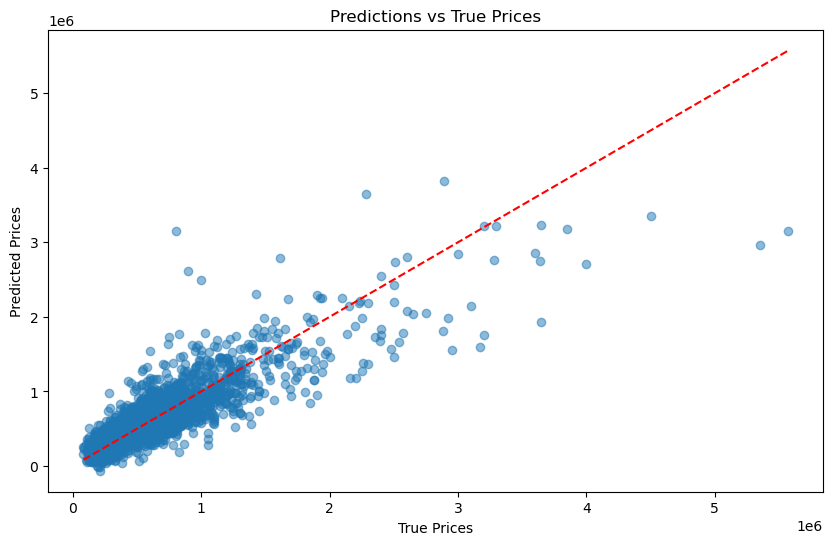

In [19]:
#Scatter Plot: Predictions vs True Values

plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, predictions, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         color='red', linestyle='--')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Predictions vs True Prices")
plt.show()

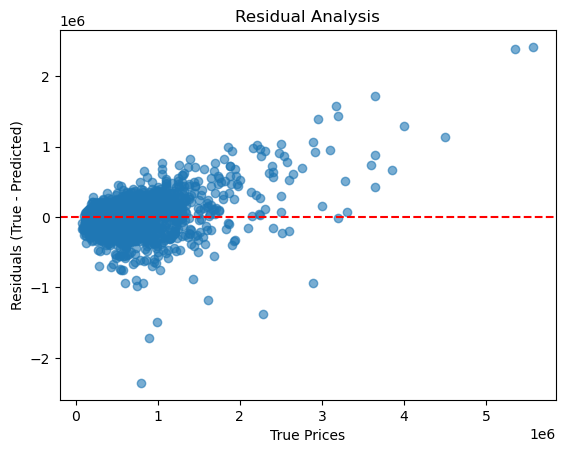

In [20]:
#Residual Plot

residuals = y_test_original - predictions
import matplotlib.pyplot as plt
plt.scatter(y_test_original, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('True Prices')
plt.ylabel('Residuals (True - Predicted)')
plt.title('Residual Analysis')
plt.show()

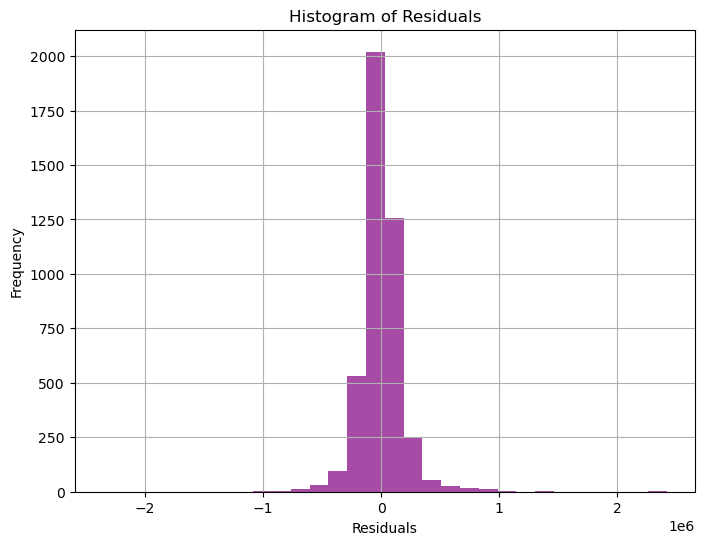

In [21]:
#Histogram of Residuals

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color="purple", alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Softmax Layer (Classification NN)

Since this is a regression task, softmax is not strictly needed. In regression tasks, the goal is to predict a continuous value, Softmax, however, converts output values into probabilities, which is only meaningful in classification problems.

However, here is a standalone implementation of the softmax function and how it integrates into a classification version of this neural network:

In [22]:

#NOT SO SURE ABOUT THIS CODE SO I COMMENTED IT OUT!!

''' def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))  # Prevent overflow
    softmax_probs = exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
    return softmax_probs

class NeuralNetworkWithSoftmax:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_rate=0.5):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden_size1))
        self.W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
        self.b2 = np.zeros((1, hidden_size2))
        self.W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2. / hidden_size2)
        self.b3 = np.zeros((1, output_size))

        self.optimizer = AdamOptimizer(learning_rate=0.001)
        self.dropout_rate = dropout_rate

    def forward(self, X, training=True):
        # First hidden layer
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.A1 = dropout(self.A1, self.dropout_rate, training)

        # Second hidden layer
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = relu(self.Z2)
        self.A2 = dropout(self.A2, self.dropout_rate, training)

        # Output layer (softmax probabilities)
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = softmax(self.Z3)  # Apply softmax to get probabilities
        return self.A3

    def backward(self, X, y, lambda_reg=0.01):
        m = X.shape[0]

        # Convert y to one-hot encoding
        y_onehot = np.zeros_like(self.A3)
        y_onehot[np.arange(m), y] = 1

        # Gradients for softmax output layer
        dZ3 = self.A3 - y_onehot
        dW3 = np.dot(self.A2.T, dZ3) / m + lambda_reg * self.W3
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m

        # Gradients for second hidden layer
        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * relu_derivative(self.Z2)
        dW2 = np.dot(self.A1.T, dZ2) / m + lambda_reg * self.W2
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        # Gradients for first hidden layer
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m + lambda_reg * self.W1
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update parameters
        grads = {'W1': dW1, 'b1': db1, 'W2': dW2, 'b2': db2, 'W3': dW3, 'b3': db3}
        params = {'W1': self.W1, 'b1': self.b1, 'W2': self.W2, 'b2': self.b2, 'W3': self.W3, 'b3': self.b3}

        self.optimizer.update(grads, params)

        # Update model parameters
        self.W1, self.b1 = params['W1'], params['b1']
        self.W2, self.b2 = params['W2'], params['b2']
        self.W3, self.b3 = params['W3'], params['b3']

    def train(self, X, y, epochs=500):
        for epoch in range(epochs):
            self.forward(X, training=True)
            self.backward(X, y)
            if epoch % 10 == 0:
                loss = -np.sum(np.log(self.A3[np.arange(y.shape[0]), y])) / y.shape[0]  # Cross-entropy loss
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X):
        probs = self.forward(X, training=False)
        return np.argmax(probs, axis=1) '''

# Dropout

In [23]:
# Define the dropout layer function
def dropout(X, dropout_rate, training=True):
    if training:
        mask = np.random.rand(*X.shape) < (1 - dropout_rate)
        X = X * mask / (1 - dropout_rate)
    return X

# Updated Neural Network class with dropout
class NeuralNetworkWithDropout:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size=1, dropout_rate=0.3):
        self.W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden_size1))
        
        self.W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
        self.b2 = np.zeros((1, hidden_size2))
        
        self.W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2. / hidden_size2)
        self.b3 = np.zeros((1, output_size))

        self.optimizer = AdamOptimizer(learning_rate=0.001)
        self.dropout_rate = dropout_rate  # The dropout rate (e.g., 0.3 means 30% of neurons will be dropped)

    def forward(self, X, training=True):
        # First hidden layer
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.A1 = dropout(self.A1, self.dropout_rate, training)

        # Second hidden layer
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = relu(self.Z2)
        self.A2 = dropout(self.A2, self.dropout_rate, training)

        # Output layer
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = self.Z3  # Linear output for regression
        return self.A3

    def backward(self, X, y, lambda_reg=0.01):
        m = X.shape[0]

        # Compute gradients for output layer
        dZ3 = self.A3 - y
        dW3 = np.dot(self.A2.T, dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m
        
        # Compute gradients for second hidden layer
        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * relu_derivative(self.Z2)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        # Compute gradients for first hidden layer
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Apply L2 regularization
        grads = {
            'W1': dW1 + lambda_reg * self.W1,
            'W2': dW2 + lambda_reg * self.W2,
            'W3': dW3 + lambda_reg * self.W3,
            'b1': db1,
            'b2': db2,
            'b3': db3
        }
        
        # Update parameters
        params = {
            'W1': self.W1,
            'W2': self.W2,
            'W3': self.W3,
            'b1': self.b1,
            'b2': self.b2,
            'b3': self.b3
        }
        
        self.optimizer.update(grads, params)

        # Update model parameters
        self.W1 = params['W1']
        self.W2 = params['W2']
        self.W3 = params['W3']
        self.b1 = params['b1']
        self.b2 = params['b2']
        self.b3 = params['b3']

    def train(self, X, y, epochs=500):
        for epoch in range(epochs):
            self.forward(X, training=True)  
            self.backward(X, y)
            if epoch % 10 == 0:
                loss = mse_loss(self.A3, y)
                print(f"Epoch {epoch}, Loss: {loss}")

# Initialize and train the neural network with dropout
nn_dropout = NeuralNetworkWithDropout(input_size=X_train.shape[1], hidden_size1=128, hidden_size2=64, output_size=1, dropout_rate=0.5)
nn_dropout.train(X_train, y_train, epochs=100)

predictions = y_scaler.inverse_transform(predictions_scaled)
y_test_original = y_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate
mse = np.mean((predictions - y_test_original)**2)
rmse = np.sqrt(mse)
print(f"\nTest MSE: {mse}")
print(f"Test RMSE: {rmse}")

Epoch 0, Loss: 10.014893843440095
Epoch 10, Loss: 6.928571188039714
Epoch 20, Loss: 4.781794903272021
Epoch 30, Loss: 4.008347181653331
Epoch 40, Loss: 3.4134251303581067
Epoch 50, Loss: 2.881892319160394
Epoch 60, Loss: 2.6514886309739776
Epoch 70, Loss: 2.239736107876867
Epoch 80, Loss: 2.0683350462628054
Epoch 90, Loss: 1.8620106319782423

Test MSE: 37815774883.79282
Test RMSE: 194462.7853441188


# Fully Parametrizable Neural Network class

In [32]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))  # Numerical stability
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

# Dropout Layer
def dropout(X, dropout_rate, training=True):
    if training:
        mask = np.random.rand(*X.shape) < (1 - dropout_rate)
        X = X * mask / (1 - dropout_rate)
    return X

# L2 Regularization (Weight Decay)
def l2_regularization(weights, lambda_reg):
    return lambda_reg * np.sum(np.square(weights))

# Adam Optimizer
class AdamOptimizer:
    def __init__(self, learning_rate=0.0001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0
    
    def update(self, grads, params):
        self.t += 1
        if self.m is None:
            self.m = {key: np.zeros_like(val) for key, val in params.items()}
            self.v = {key: np.zeros_like(val) for key, val in params.items()}
        
        for key in params:
            self.m[key] = self.beta1 * self.m[key] + (1 - self.beta1) * grads[key]
            self.v[key] = self.beta2 * self.v[key] + (1 - self.beta2) * grads[key]**2
            
            m_hat = self.m[key] / (1 - self.beta1**self.t)
            v_hat = self.v[key] / (1 - self.beta2**self.t)
            
            # Gradient clipping
            max_grad = 1.0
            m_hat = np.clip(m_hat, -max_grad, max_grad)
            v_hat = np.clip(v_hat, -max_grad, max_grad)
            
            params[key] -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)


# Neural Network Class
class FullyParametrizableNN:
    def __init__(self, input_size, hidden_layers, activations, dropout_rate=0.3, lambda_reg=0.01):
        # Ensure the activations list matches the number of hidden layers
        if len(activations) != len(hidden_layers):
            raise ValueError("The number of activation functions must match the number of hidden layers.")
        
        self.layers = [input_size] + hidden_layers + [1]  # Define the architecture (input, hidden, output)
        self.activations = activations  # List of activation functions
        self.dropout_rate = dropout_rate
        self.lambda_reg = lambda_reg
        
        # Weight initialization (scale by 10 to prevent overflow)
        self.W = []
        self.b = []
        for i in range(len(self.layers) - 1):
            self.W.append(np.random.randn(self.layers[i], self.layers[i+1]) * np.sqrt(2. / self.layers[i]) / 10)
            self.b.append(np.zeros((1, self.layers[i+1])))
        
        # Adam optimizer
        self.optimizer = AdamOptimizer(learning_rate=0.0001)
    
    def forward(self, X, training=True):
        self.A = [X]  # First layer input is the input X
        self.Z = []
        
        for i in range(len(self.layers) - 1):
            Z = np.dot(self.A[-1], self.W[i]) + self.b[i]
            self.Z.append(Z)
            
            # Apply activation function for hidden layers only
            if i < len(self.layers) - 2:  # Skip the output layer
                if self.activations[i] == 'relu':
                    A = relu(Z)
                elif self.activations[i] == 'sigmoid':
                    A = sigmoid(Z)
                elif self.activations[i] == 'tanh':
                    A = tanh(Z)
                self.A.append(A)
                
                # Apply dropout if training
                if training:
                    A = dropout(A, self.dropout_rate, training)
            else:
                # No activation function for the output layer (regression)
                self.A.append(Z)
    
    def backward(self, X, y, learning_rate=0.0001, lambda_reg=0.01):
        m = X.shape[0]
        
        # Compute gradients for each layer
        dZ = self.A[-1] - y
        grads = {'W' + str(len(self.layers)-1): np.dot(self.A[-2].T, dZ) / m, 'b' + str(len(self.layers)-1): np.sum(dZ, axis=0, keepdims=True) / m}
        
        # Loop backward through layers
        for i in range(len(self.layers) - 3, -1, -1):
            dA = np.dot(dZ, self.W[i+1].T)
            if self.activations[i] == 'relu':
                dZ = dA * relu_derivative(self.Z[i])
            elif self.activations[i] == 'sigmoid':
                dZ = dA * sigmoid_derivative(self.Z[i])
            elif self.activations[i] == 'tanh':
                dZ = dA * tanh_derivative(self.Z[i])
            
            grads['W' + str(i)] = np.dot(self.A[i].T, dZ) / m
            grads['b' + str(i)] = np.sum(dZ, axis=0, keepdims=True) / m
        
        # Apply L2 regularization
        for key in grads:
            if 'W' in key:
                grads[key] += lambda_reg * self.W[int(key[1:])]  # Apply L2 regularization to weights
        
        # Gradient Clipping
        max_grad = 1.0
        for key in grads:
            grads[key] = np.clip(grads[key], -max_grad, max_grad)
        
        # Update parameters
        self.optimizer.update(grads, self.W)
    
    def train(self, X, y, epochs=500):
        for epoch in range(epochs):
            self.forward(X, training=True)  
            self.backward(X, y)
            
            # Calculate and check for NaN loss
            loss = np.mean((self.A[-1] - y) ** 2)
            if np.isnan(loss):
                print("Loss is NaN, check forward and backward pass")
                break  # Stop training if NaN loss
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

                
# Example usage
input_size = X_train.shape[1]
hidden_layers = [64, 32]
activations = ['relu', 'relu']
dropout_rate = 0.3
lambda_reg = 0.01
nn = FullyParametrizableNN(input_size, hidden_layers, activations, dropout_rate, lambda_reg)
nn.train(X_train, y_train, epochs=100)


IndexError: list index out of range